In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [17]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [18]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_GA_2018'
EXPERIMENT_SESSION_UUID = 'a4febf95-81bf-4aee-9b51-a690d596d5d2'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']

In [19]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [20]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [21]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [22]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(448, 27)

In [23]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.767077,0.815636,0.760689,0.782871,0.731707,0.932075,0.743238,0.808902,0.7754
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.767077,0.815636,0.760689,0.782871,0.731707,0.932075,0.743238,0.808902,0.7754
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 19:32:20.367,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.766112,0.814469,0.760689,0.781363,0.731707,0.928302,0.742062,0.808085,0.7744
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 19:38:47.899,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.766353,0.814469,0.760689,0.781665,0.731707,0.928302,0.742062,0.808493,0.7746
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 19:32:20.377,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.764663,0.815636,0.757720,0.781363,0.727642,0.935849,0.741278,0.806860,0.7734
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 19:38:47.910,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.765387,0.815636,0.758314,0.781966,0.728997,0.935849,0.741670,0.807677,0.7740
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 19:32:20.387,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.760560,0.814469,0.747625,0.781062,0.723577,0.939623,0.739318,0.801552,0.7698
7,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 19:38:47.922,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.760801,0.814469,0.748219,0.781062,0.724932,0.939623,0.739318,0.801960,0.7700
8,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 19:32:20.397,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.754043,0.814469,0.742874,0.775332,0.719512,0.939623,0.733830,0.796243,0.7644
9,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 19:38:47.932,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.754767,0.814469,0.744656,0.775332,0.723577,0.939623,0.734614,0.796652,0.7650


In [24]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [25]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.767077,0.815636,0.760689,0.782871,0.731707,0.932075,0.743238,0.808902,0.775400
29,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:40:08.724,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.759594,0.794632,0.758314,0.769300,0.735772,0.909434,0.746374,0.785627,0.765600
57,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.000000,0.000000,0.147268,0.000000,0.000000,0.000000,0.000000,0.178236,0.000000
85,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:40:08.724,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.000000,0.123874,0.200752,0.000000,0.186986,0.000000,0.000000,0.216003,0.000000
113,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.789715,0.888732,0.802548,0.818548,0.762590,0.961702,0.781302,0.844725,0.813114
141,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:40:08.724,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.782152,0.875706,0.798015,0.807450,0.760148,0.948498,0.779105,0.828375,0.804275
169,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.146491,0.043939,0.104918,0.130621,0.140541,0.030043,0.122281,0.122069,0.122170
197,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:40:08.724,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.157796,0.060606,0.121311,0.141328,0.164865,0.051502,0.144036,0.126207,0.134747
225,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:38:47.888,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.323762,0.654822,0.399220,0.328729,0.396739,0.343750,0.403941,0.291291,0.353180
253,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:40:08.724,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.327228,0.690355,0.384915,0.345994,0.364130,0.375000,0.373563,0.342342,0.359495


In [26]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.767077,0.815636,0.760689,0.782871,0.731707,0.932075,0.743238,0.808902,0.775400
28,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:33:37.721,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.759594,0.794632,0.758314,0.769300,0.735772,0.909434,0.746374,0.785627,0.765600
56,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.000000,0.000000,0.147268,0.000000,0.000000,0.000000,0.000000,0.178236,0.000000
84,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:33:37.721,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.000000,0.123874,0.200752,0.000000,0.186986,0.000000,0.000000,0.216003,0.000000
112,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.789715,0.888732,0.802548,0.818548,0.762590,0.961702,0.781302,0.844725,0.813114
140,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:33:37.721,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.782152,0.875706,0.798015,0.807450,0.760148,0.948498,0.779105,0.828375,0.804275
168,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.146491,0.043939,0.104918,0.130621,0.140541,0.030043,0.122281,0.122069,0.122170
196,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:33:37.721,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.157796,0.060606,0.121311,0.141328,0.164865,0.051502,0.144036,0.126207,0.134747
224,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:32:20.357,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.323762,0.654822,0.399220,0.328729,0.396739,0.343750,0.403941,0.291291,0.353180
252,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:33:37.721,...,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.327228,0.690355,0.384915,0.345994,0.364130,0.375000,0.373563,0.342342,0.359495


In [27]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [28]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.8].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,-0.000598,0.031110,-0.092185,-0.088157,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.014241,0.111232,-0.341305,-0.046875,DecisionTreeClassifier
2,Disparate_Impact,1.090899,1.125296,1.060143,1.288661,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.109047,0.150650,0.071989,0.307244,DecisionTreeClassifier
4,Accuracy_Parity,-0.030294,-0.039727,-0.066942,-0.213241,DecisionTreeClassifier
5,Label_Stability_Ratio,1.062370,1.013115,0.871746,0.907723,DecisionTreeClassifier
6,IQR_Parity,-0.050076,0.000900,0.028048,-0.013322,DecisionTreeClassifier
7,Std_Parity,-0.031028,0.001717,0.025514,0.001999,DecisionTreeClassifier
8,Std_Ratio,0.743371,1.016435,1.303977,1.022308,DecisionTreeClassifier
9,Jitter_Parity,-0.031485,-0.007031,0.090700,0.071468,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [29]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [30]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.741612
1,Entropy,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.132861
2,F1,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.778018
3,FNR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.116345
4,FPR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,AGEP_dis,0.407673
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,1.253503
140,Selection-Rate,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.697700
141,Std,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.112226
142,TNR,DecisionTreeClassifier,10.0,5.0,100.0,100.0,overall,0.562246


In [31]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,-0.000821
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,0.016063
2,Disparate_Impact,DecisionTreeClassifier,SEX,1.091833
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,0.110263
4,Accuracy_Parity,DecisionTreeClassifier,SEX,-0.031331
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.008130
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.033193
7,Std_Parity,DecisionTreeClassifier,SEX,-0.022754
8,Std_Ratio,DecisionTreeClassifier,SEX,0.816258
9,Jitter_Parity,DecisionTreeClassifier,SEX,0.005055


### Subgroup metrics per dataset, experiment iteration, and model

In [57]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [56]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [34]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [35]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [36]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [37]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [38]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [39]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [40]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

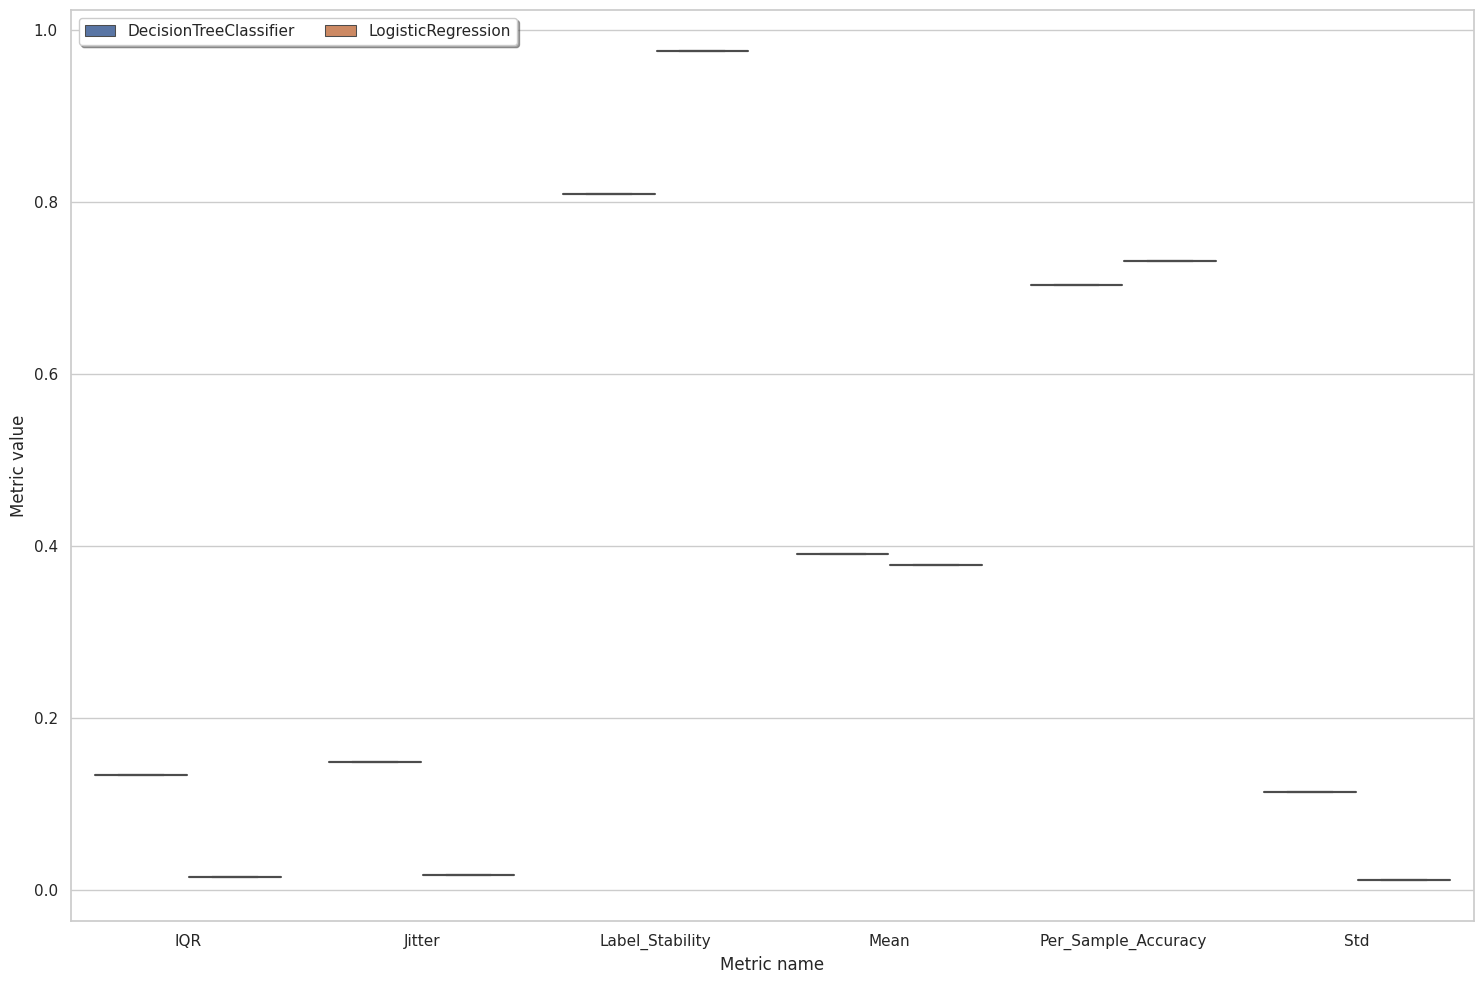

In [42]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

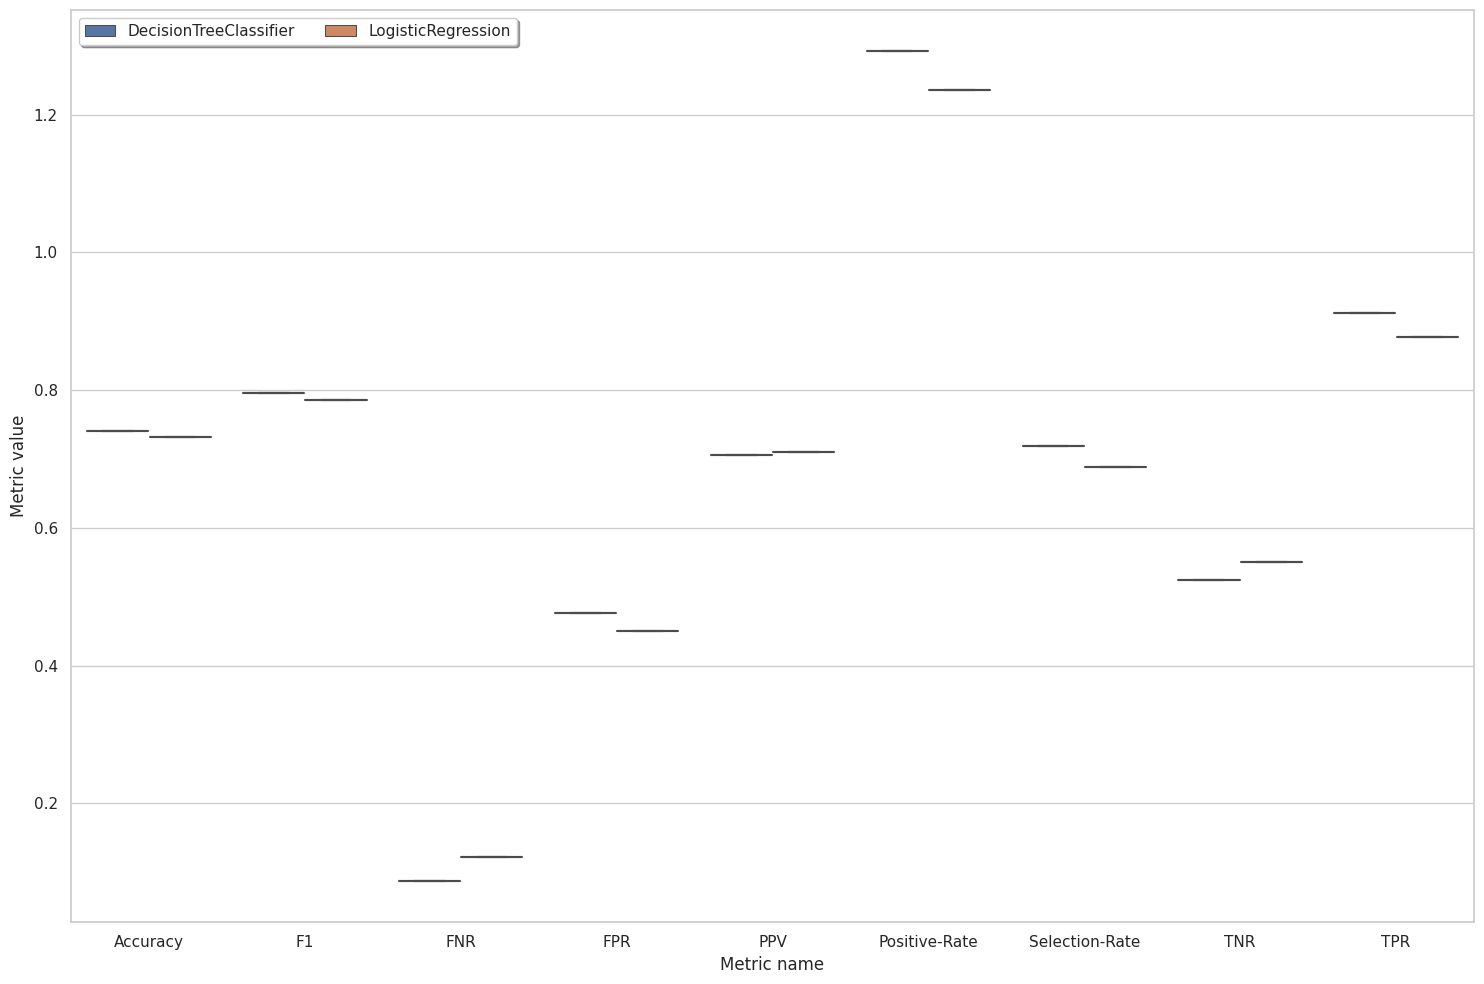

In [43]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

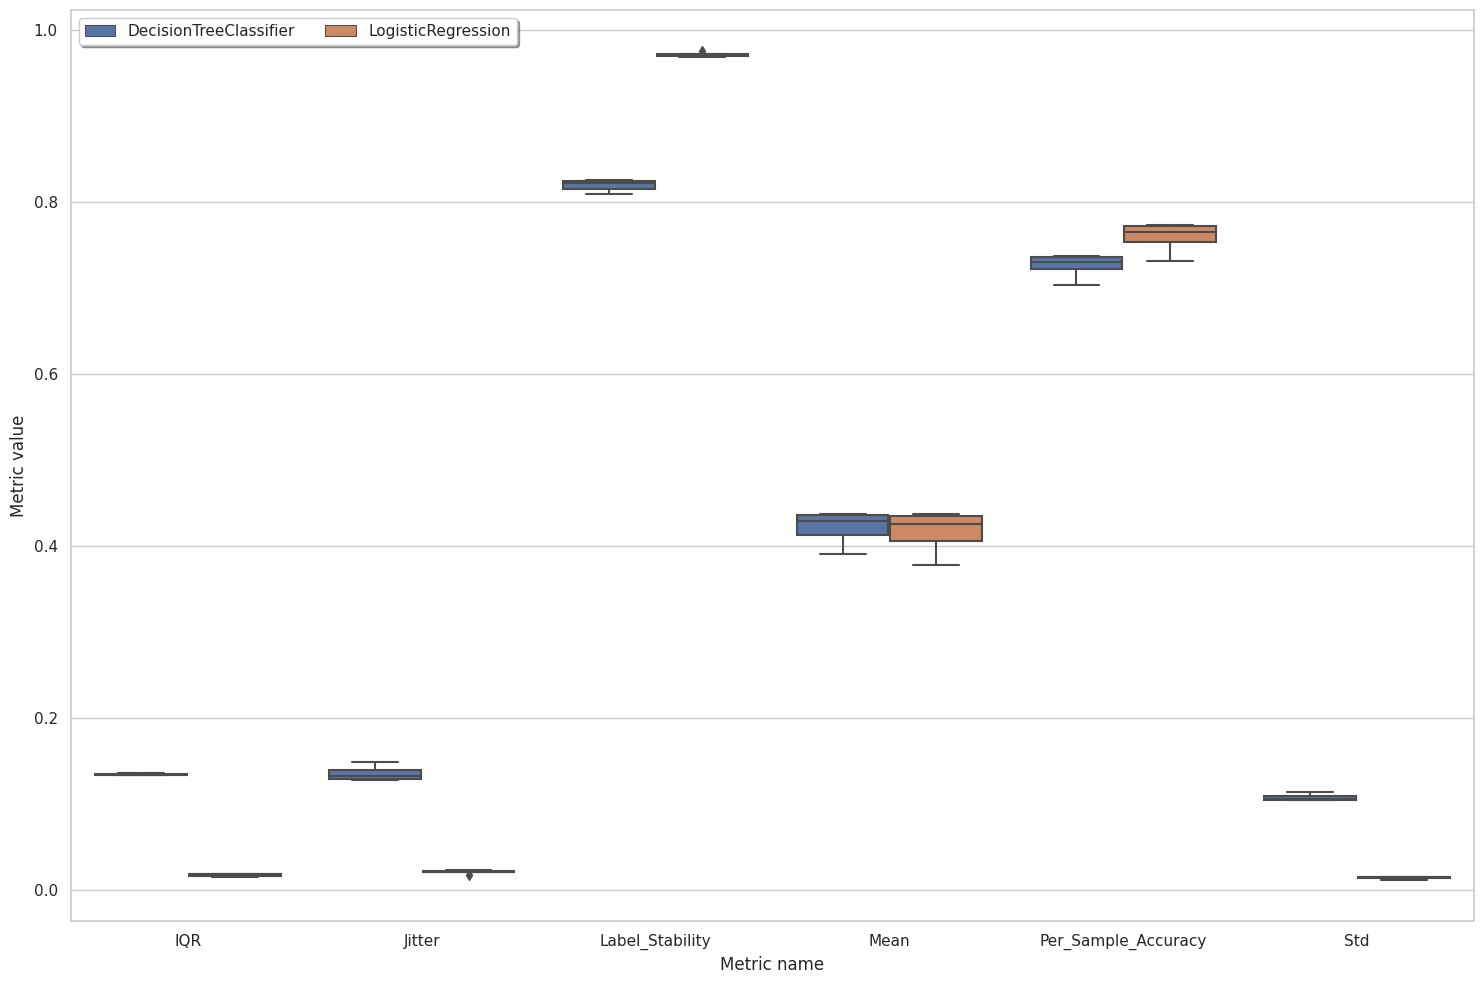

In [54]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

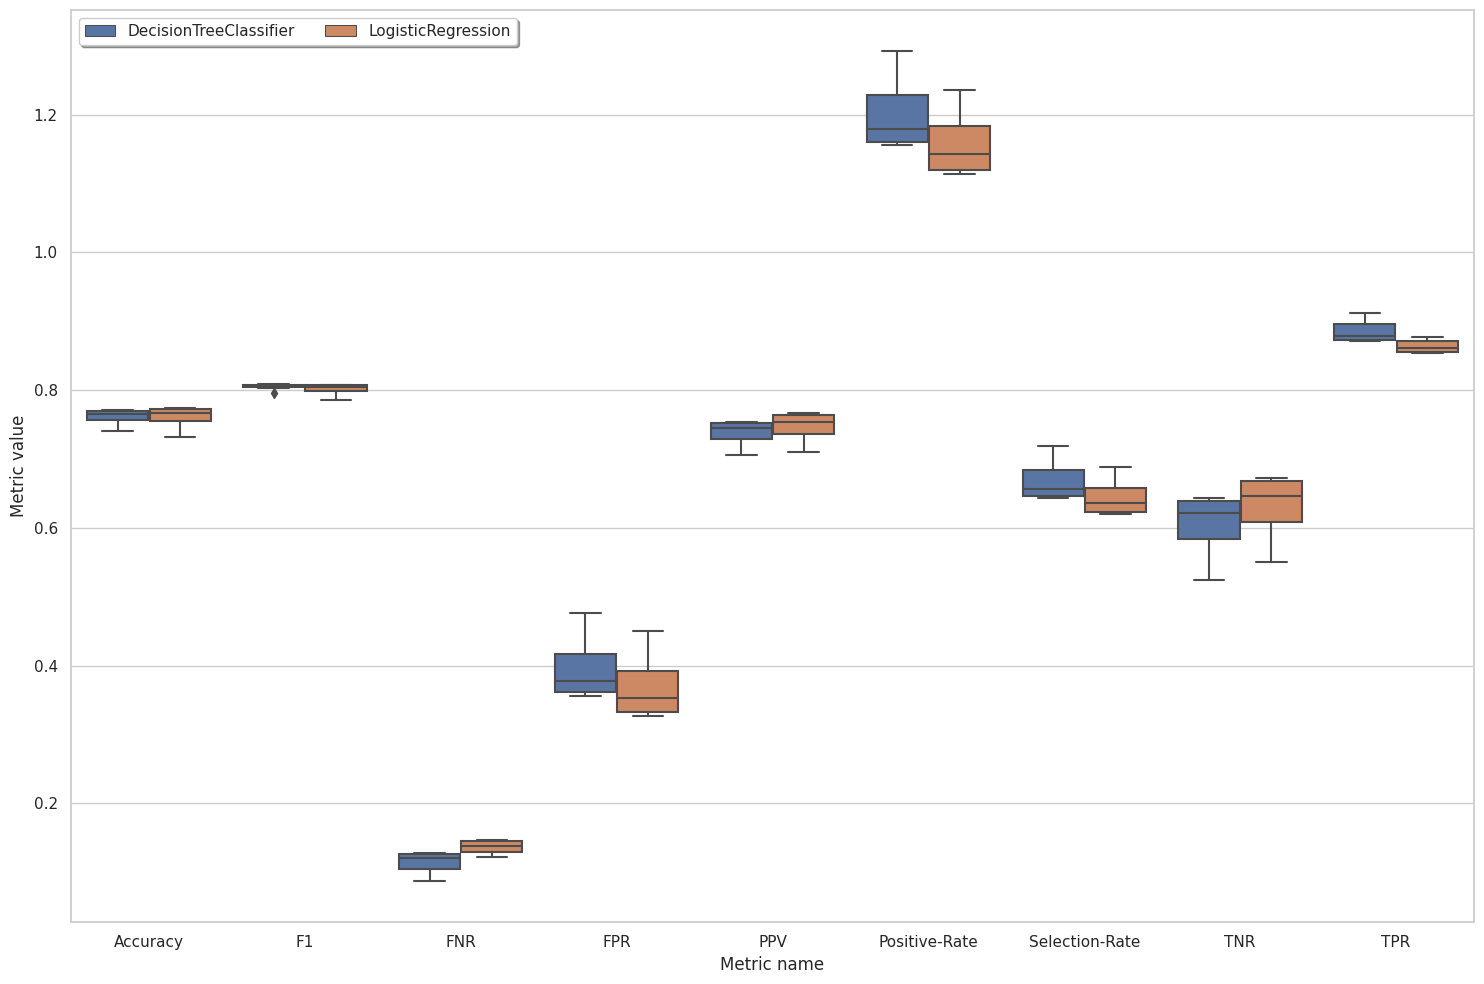

In [49]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')

In [52]:
visualizer.melted_exp_avg_exp_iters_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]][1.0].head(1000)

,Model_Name,Test_Set_Index,Metric,Subgroup,Num_Estimators,Metric_Value,Percentage,Preprocessing_Technique
0,DecisionTreeClassifier,6.0,Accuracy,AGEP_dis,10.0,0.728578,1.0,"cat: mode, num: median"
1,DecisionTreeClassifier,6.0,Accuracy,AGEP_priv,10.0,0.795799,1.0,"cat: mode, num: median"
2,DecisionTreeClassifier,6.0,Accuracy,RAC1P_dis,10.0,0.702791,1.0,"cat: mode, num: median"
3,DecisionTreeClassifier,6.0,Accuracy,RAC1P_priv,10.0,0.759047,1.0,"cat: mode, num: median"
4,DecisionTreeClassifier,6.0,Accuracy,SEX&RAC1P&AGEP_dis,10.0,0.693767,1.0,"cat: mode, num: median"
...,...,...,...,...,...,...,...,...
139,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_dis,10.0,0.905405,1.0,"cat: mode, num: median"
140,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_priv,10.0,0.995708,1.0,"cat: mode, num: median"
141,DecisionTreeClassifier,6.0,TPR,SEX_dis,10.0,0.908477,1.0,"cat: mode, num: median"
142,DecisionTreeClassifier,6.0,TPR,SEX_priv,10.0,0.915862,1.0,"cat: mode, num: median"


In [53]:
visualizer.melted_exp_avg_exp_iters_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[1]][1.0].head(1000)

,Model_Name,Test_Set_Index,Metric,Subgroup,Num_Estimators,Metric_Value,Percentage,Preprocessing_Technique
0,DecisionTreeClassifier,6.0,Accuracy,AGEP_dis,10.0,0.729302,1.0,"cat: mode_trimmed_0.3, num: median"
1,DecisionTreeClassifier,6.0,Accuracy,AGEP_priv,10.0,0.795799,1.0,"cat: mode_trimmed_0.3, num: median"
2,DecisionTreeClassifier,6.0,Accuracy,RAC1P_dis,10.0,0.702494,1.0,"cat: mode_trimmed_0.3, num: median"
3,DecisionTreeClassifier,6.0,Accuracy,RAC1P_priv,10.0,0.760103,1.0,"cat: mode_trimmed_0.3, num: median"
4,DecisionTreeClassifier,6.0,Accuracy,SEX&RAC1P&AGEP_dis,10.0,0.696477,1.0,"cat: mode_trimmed_0.3, num: median"
...,...,...,...,...,...,...,...,...
139,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_dis,10.0,0.908108,1.0,"cat: mode_trimmed_0.3, num: median"
140,DecisionTreeClassifier,6.0,TPR,SEX&RAC1P&AGEP_priv,10.0,0.995708,1.0,"cat: mode_trimmed_0.3, num: median"
141,DecisionTreeClassifier,6.0,TPR,SEX_dis,10.0,0.908477,1.0,"cat: mode_trimmed_0.3, num: median"
142,DecisionTreeClassifier,6.0,TPR,SEX_priv,10.0,0.915172,1.0,"cat: mode_trimmed_0.3, num: median"
